# Compare Lagrangian Output files for VVL test cases
- Plot the Oil Thickness of the 0,2, and -2 ssh test cases side by side with intervals of 6 hours

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
from salishsea_tools import viz_tools
import matplotlib.colors as colors
%matplotlib inline

In [3]:
zero = xr.open_dataset('/ocean/abhudia/MEOPAR/analysis-ashutosh/other/results/vvl_testing/vvl_ssh0/Lagrangian_vvl_ssh0.nc')
two = xr.open_dataset('/ocean/abhudia/MEOPAR/analysis-ashutosh/other/results/vvl_testing/vvl_ssh2/Lagrangian_vvl_ssh2.nc')
neg2 = xr.open_dataset('/ocean/abhudia/MEOPAR/analysis-ashutosh/other/results/vvl_testing/vvl_sshneg2/Lagrangian_vvl_sshneg2.nc')

In [3]:
def plot_params(array, mask_value = 0):
    """Produce array, slicing bounds and maximum value of array for visualising full region of oil spill

    :arg array: 2D or 3D array of MOHID output, mainly concentration or oil thickness
    
    :arg mask_value: value used to mask out area where ther is no oil
    
    :returns: tuple consisting of truncated array bounding the oil data needed, the x and y bounds for
              further visualisation and the maximum value contained in the array for normalisation
    """
    # for 3D array case
    if len(array.shape) == 3:
        z_indices, y_indices, x_indices = np.where(array != mask_value)
    # for 2D array case
    else:
        y_indices, x_indices = np.where(array != mask_value)
    # if all values are the mask value
    if y_indices.shape[0] == 0:
        return False
    # !!!!!! what about when it is 1
    # the bounds to slice the so that we only have the parts with oil data we are interested in
    y_min, y_max = y_indices.min(), y_indices.max()+1
    x_min, x_max = x_indices.min(), x_indices.max()+1
    # slice the input array according to these bounds
    if len(array.shape) == 3:
        array = array[...,:,y_min:y_max, x_min:x_max]
    else:
        array = array[y_min:y_max, x_min:x_max]
    # get the maximum value in the array for colormap normalisation
    maxval = array.max()
    return (array, y_min, y_max, x_min, x_max, maxval)

In [4]:
def plot_thickness():
    mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02').tmaskutil.isel(time = 0).values[0:896:,0:396]
    zero_plt = zero.Thickness_2D.values
    two_plt = two.Thickness_2D.values
    neg2_plt = neg2.Thickness_2D.values
    first_loop = True
    for arg in [zero_plt, two_plt, neg2_plt]:
        array, y_min, y_max, x_min, x_max, maxval = plot_params(arg)
        current_maxval = array.max()
        if  current_maxval> maxval:
            maxval = current_maxval
        if first_loop:
            yminall, ymaxall, xminall, xmaxall = y_min, y_max, x_min, x_max
            first_loop = False
        else:
            if y_min < yminall:
                yminall = y_min
            if x_min <xminall:
                xminall = x_min
            if y_max > ymaxall:
                ymaxall = y_max
            if x_max > xmaxall:
                xmaxall = x_max

    fig = plt.figure(figsize = (30,150))
    
    for i, t in enumerate(range(0,168, 6)):
        time = zero.time[t].values
        i += 1

        ax = plt.subplot(168/6,3,3*i-2)
        zero_plt = zero.Thickness_2D.isel(time = t).values[yminall:ymaxall, xminall:xmaxall]
        zero_plt = np.select([zero_plt == 0, zero_plt !=0], [np.nan, zero_plt])
        plot = plt.pcolormesh(zero_plt, cmap = 'inferno',  norm=colors.LogNorm(vmin=0.001, vmax=maxval))
        cbar = plt.colorbar(plot)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil thickness (microns)', rotation=270)
        #plt.contour(mask[yminall:ymaxall, xminall:xmaxall], levels = [-0.1, 0.1])
        plt.contourf(mask[yminall:ymaxall, xminall:xmaxall], levels = [-0.1, 0.1],colors = 'Burlywood')
        plt.title(f'SSH=0, time: {time}')


        ax2 = plt.subplot(168/6,3, 3*i-1)
        two_plt = two.Thickness_2D.isel(time = t).values[yminall:ymaxall, xminall:xmaxall]
        two_plt = np.select([two_plt == 0, two_plt !=0], [np.nan, two_plt])
        plot = plt.pcolormesh(two_plt, cmap = 'inferno',  norm=colors.LogNorm(vmin=0.001, vmax=maxval))
        cbar = plt.colorbar(plot)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil thickness (microns)', rotation=270)
        #plt.contour(mask[yminall:ymaxall, xminall:xmaxall], levels = [-0.1, 0.1])
        plt.contourf(mask[yminall:ymaxall, xminall:xmaxall], levels = [-0.1, 0.1],colors = 'Burlywood')
        plt.title(f'SSH=2, time: {time}')
        
        ax3 = plt.subplot(168/6,3, 3*i)
        neg2_plt = neg2.Thickness_2D.isel(time = t).values[yminall:ymaxall, xminall:xmaxall]
        neg2_plt = np.select([neg2_plt == 0, neg2_plt !=0], [np.nan, neg2_plt])
        plot = plt.pcolormesh(neg2_plt, cmap = 'inferno',  norm=colors.LogNorm(vmin=0.001, vmax=maxval))
        cbar = plt.colorbar(plot)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil thickness (microns)', rotation=270)
        #plt.contour(mask[yminall:ymaxall, xminall:xmaxall], levels = [-0.1, 0.1])
        plt.contourf(mask[yminall:ymaxall, xminall:xmaxall], levels = [-0.1, 0.1],colors = 'Burlywood')
        plt.title(f'SSH=-2, time: {time}')
        
    plt.tight_layout()

/home/abhudia/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


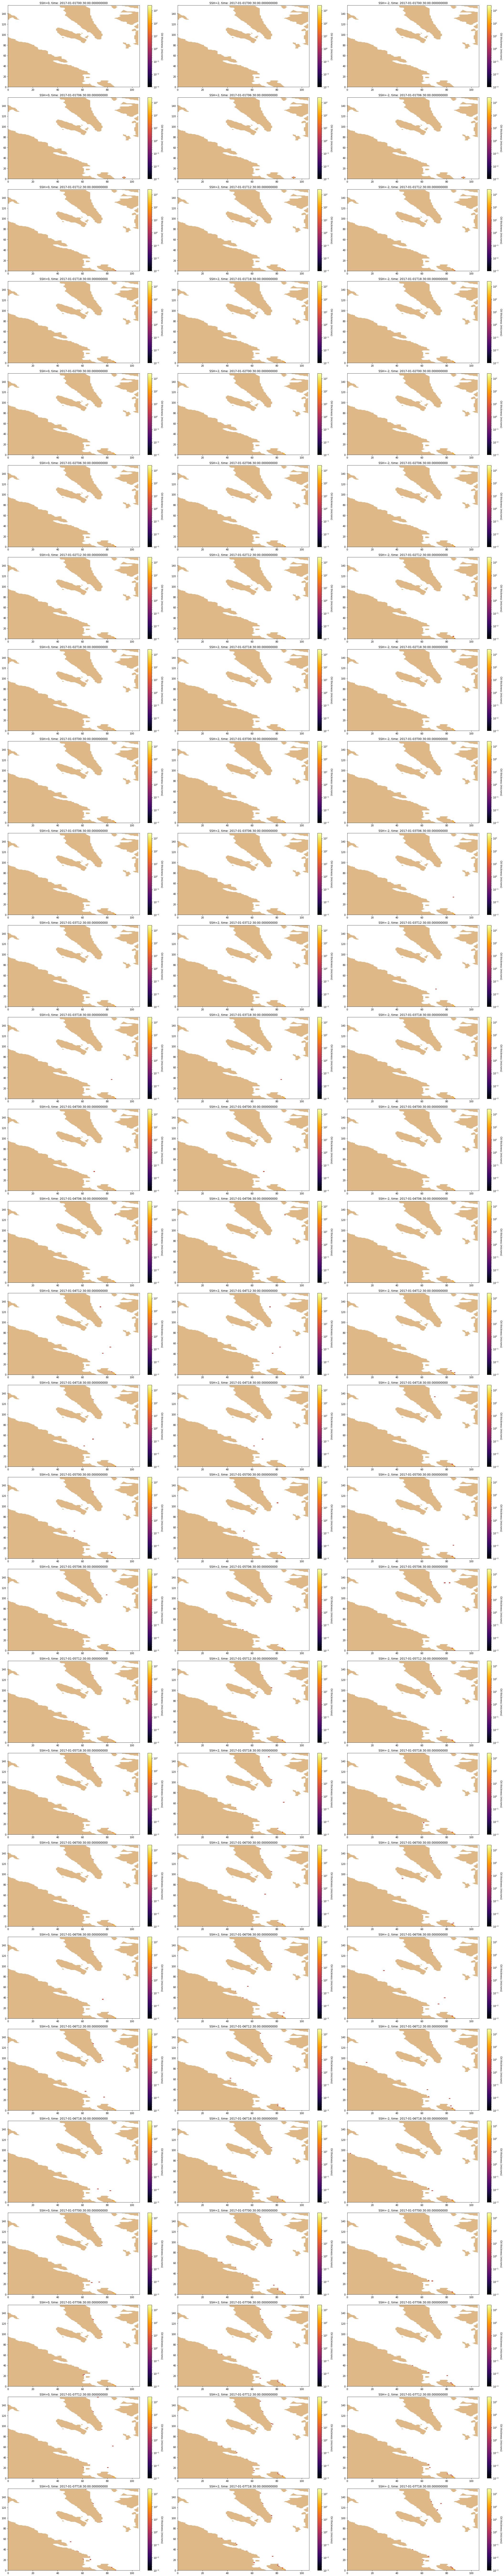

In [5]:
plot_thickness()
